In [2]:
import pandas as pd

df = pd.read_csv("company_website_second_round_with_additional_firms.csv")
print(df.columns)

Index(['Unnamed: 0', 'std_name', 'company_name', 'company_website_link',
       'Made_in_USA_related_info_link', 'notes', 'list_order', 'list_title',
       'list_link', 'Title_List_Name',
       ...
       '1997-07', '1997-06', '1997-05', '1997-04', '1997-03', '1997-02',
       '1997-01', '1996-12', '1996-11', '1996-10'],
      dtype='object', length=339)


/var/folders/rw/s7c9z30x7fj_2gcngv0yhv6w0000gn/T/ipykernel_80286/1280922479.py:3: DtypeWarning: Columns (300,304,325,328) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("company_website_second_round_with_additional_firms.csv")


In [3]:
selected_cols = reversed([col for col in df.columns if col.startswith("1") or col.startswith("2")])
df = df[selected_cols]
print(df.columns)

Index(['1996-10', '1996-11', '1996-12', '1997-01', '1997-02', '1997-03',
       '1997-04', '1997-05', '1997-06', '1997-07',
       ...
       '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
       '2023-07', '2023-08', '2023-09', '2023-10'],
      dtype='object', length=325)


In [4]:
keywords = [
    "anti import",
    "anti-import",
    "anti smuggling",
    "china",
    "chinese",
    "border watch",
    "cut sewn",
    "deglobalization",
    "design manufacture",
    "domestic manufacturing",
    "dumping",
    "export control",
    "foreign",
    "friend shoring",
    "fueling american economy",
    "global parts",
    "global sourcing",
    "homegrown",
    "import ban",
    "import duty",
    "import export regulations",
    "import quotas",
    "import tariffs",
    "imported components",
    "imported goods",
    "imported products",
    "imports",
    "india",
    "ingenuity",
    "inspection",
    "international competitors",
    "international goods",
    "international orders",
    "maintain american factories",
    "manufacturing facility",
    "manufacturing process",
    "mexico",
    "mexican",
    "nationally",
    "non us made",
    "non-u.s. made",
    "offshore",
    "offshoring",
    "outsourcing",
    "outsourced production",
    "overseas",
    "owned operated",
    "production facility",
    "protectionism",
    "protectionist measures",
    "reshore",
    "reshoring",
    "right here",
    "self sufficiency",
    "self-sufficiency",
    "support usa",
    "supporting",
    "taiwan",
    "trade barrier",
    "trade deficit",
    "trade war",
    "u s  based production",
    "us based company",
    "weaponizing trade",
    "prefer domestic",
    "prefers domestic",
    "preferring domestic",
    "choose domestic",
    "chooses domestic",
    "choosing domestic",
    "only domestic",
    "domestic only",
    "domestically only",
    "not outsourc",
    "doesn't outsource",
    "dont outsourc",
    "don't outsourc",
    "never outsourc",
    "refus outsourc",
    "refusing outsourc",
    "no import",
    "not import",
    "doesn't import",
    "dont import",
    "don't import",
    "never import",
    "stop import",
    "halt import",
    "refuse import",
    "refus import",
    "refusing import",
    "ban import",
    "block import",
    "america first",
    "american first",
    "american sovereignty",
    "secure america supply chain",
    "maintain america supply chain",
    "keep america working",
    "keep americans employed"
]

In [7]:
from tqdm import tqdm
import swifter

df = df.astype(str)
total_count_df = pd.DataFrame(0, index=df.index, columns=df.columns)
for keyword in tqdm(keywords):
    count_df = df.swifter.apply(lambda x: x.str.count(keyword)).fillna(0)
    total_count_df += count_df

/opt/anaconda3/envs/research/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 100/100 [02:37<00:00,  1.57s/it]


In [35]:
import numpy as np
def propagate_int_value_forward(df, mask_length=0):
    df = df.copy()
    df.mask(df <= mask_length, np.nan, inplace=True) # mask the values less than zero
    df = df.T.ffill(axis=0).T # forward fill so that the values that are np.nan get the closest preceding value in terms of columns - axis=1 leads to NotImplementedError
    df.fillna(0, inplace=True) # fill the remaining np.nan with 0
    return df

In [66]:
exists_df = df.swifter.apply(lambda x: x.str.len() > 500)
exists_df = propagate_int_value_forward(exists_df)
exists_df.sum(axis=0)

Pandas Apply: 100%|██████████| 325/325 [00:00<00:00, 411.38it/s] 


1996-10      11
1996-11      31
1996-12     122
1997-01     132
1997-02     140
           ... 
2023-06    4517
2023-07    4518
2023-08    4524
2023-09    4527
2023-10    4532
Length: 325, dtype: object

In [72]:
total_all_word_count_df = df.swifter.applymap(lambda x: len(str(x).split()))
total_all_word_count_df = propagate_int_value_forward(total_all_word_count_df, mask_length=1000)
total_all_word_count_df.sum(axis=0)

Pandas Apply: 100%|██████████| 1686425/1686425 [00:08<00:00, 188027.60it/s]


1996-10          0.0
1996-11          0.0
1996-12       5056.0
1997-01       5085.0
1997-02       5085.0
             ...    
2023-06    3393563.0
2023-07    3408638.0
2023-08    3427539.0
2023-09    3446672.0
2023-10    3512727.0
Length: 325, dtype: float64

In [38]:
total_count_df = propagate_int_value_forward(total_count_df)
total_count_df.sum(axis=0)

1996-10       1.0
1996-11       2.0
1996-12      11.0
1997-01      11.0
1997-02      12.0
            ...  
2023-06    2378.0
2023-07    2388.0
2023-08    2404.0
2023-09    2407.0
2023-10    2422.0
Length: 325, dtype: float64

In [62]:
binary_df = (total_count_df > 0).astype(int)
binary_df.sum(axis=0)

1996-10       1
1996-11       2
1996-12      10
1997-01      10
1997-02      11
           ... 
2023-06    1692
2023-07    1694
2023-08    1703
2023-09    1708
2023-10    1717
Length: 325, dtype: int64

In [73]:
print(total_count_df.sum(axis=0).tolist())
print(total_all_word_count_df.sum(axis=0).tolist())
print(exists_df.sum(axis=0).tolist())


[1.0, 2.0, 11.0, 11.0, 12.0, 12.0, 16.0, 16.0, 17.0, 17.0, 17.0, 17.0, 21.0, 21.0, 22.0, 25.0, 28.0, 28.0, 29.0, 29.0, 31.0, 32.0, 32.0, 32.0, 32.0, 38.0, 51.0, 54.0, 55.0, 55.0, 57.0, 58.0, 58.0, 58.0, 58.0, 59.0, 61.0, 63.0, 63.0, 63.0, 65.0, 68.0, 69.0, 75.0, 77.0, 80.0, 83.0, 83.0, 89.0, 89.0, 98.0, 98.0, 103.0, 110.0, 118.0, 117.0, 120.0, 122.0, 122.0, 126.0, 126.0, 132.0, 134.0, 137.0, 137.0, 143.0, 143.0, 144.0, 146.0, 145.0, 150.0, 161.0, 162.0, 170.0, 170.0, 172.0, 181.0, 180.0, 182.0, 183.0, 183.0, 183.0, 184.0, 184.0, 182.0, 181.0, 188.0, 189.0, 194.0, 203.0, 207.0, 216.0, 223.0, 221.0, 226.0, 229.0, 230.0, 234.0, 234.0, 237.0, 239.0, 240.0, 243.0, 245.0, 250.0, 257.0, 259.0, 260.0, 259.0, 263.0, 267.0, 268.0, 270.0, 272.0, 278.0, 280.0, 284.0, 285.0, 287.0, 287.0, 291.0, 298.0, 307.0, 308.0, 310.0, 310.0, 314.0, 313.0, 320.0, 326.0, 331.0, 332.0, 334.0, 340.0, 353.0, 355.0, 365.0, 373.0, 376.0, 381.0, 386.0, 392.0, 394.0, 399.0, 403.0, 406.0, 416.0, 418.0, 432.0, 434.0, 436

In [74]:
stats = pd.DataFrame({
    "count": total_count_df.sum(axis=0),
    "total_words": total_all_word_count_df.sum(axis=0),
    "exists": exists_df.sum(axis=0),
    "binary_count": binary_df.sum(axis=0)
})
stats.to_csv("antiforeign_keyword_appearance_stats.csv")

In [75]:
pd.concat([stats.head(n=10), stats.tail(n=10)])

,count,total_words,exists,binary_count
1996-10,1.0,0.0,11,1
1996-11,2.0,0.0,31,2
1996-12,11.0,5056.0,122,10
1997-01,11.0,5085.0,132,10
1997-02,12.0,5085.0,140,11
1997-03,12.0,6424.0,145,11
1997-04,16.0,6424.0,170,14
1997-05,16.0,6424.0,173,14
1997-06,17.0,9625.0,183,15
1997-07,17.0,9625.0,186,15


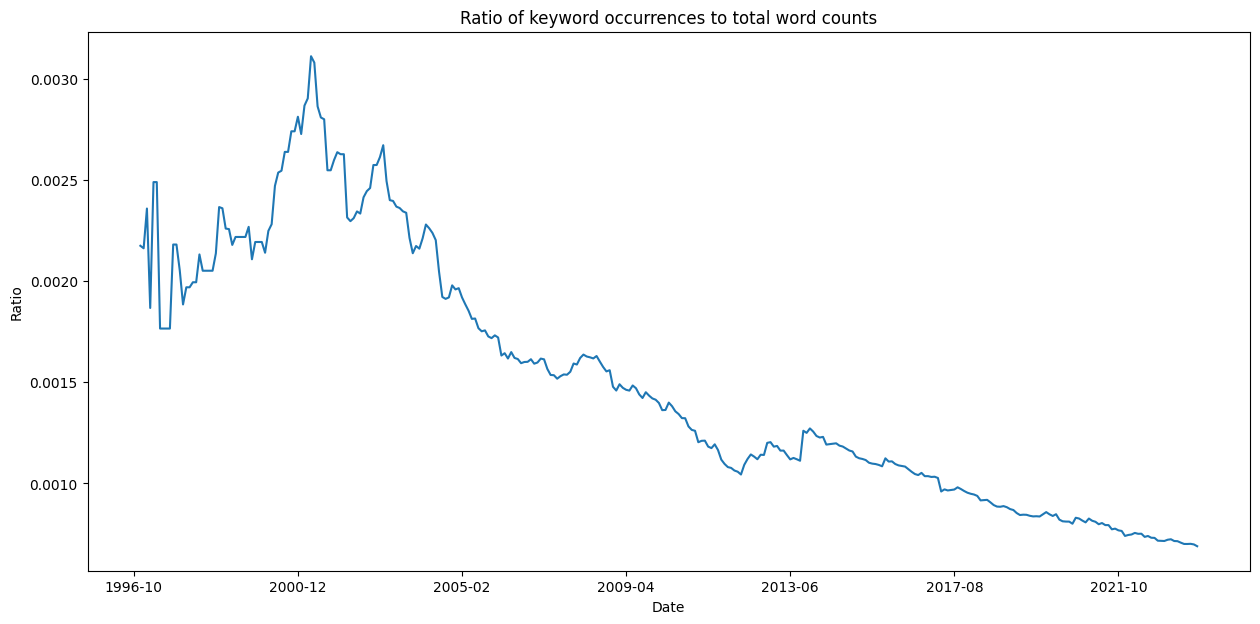

In [76]:
result = total_count_df.sum(axis=0) / total_all_word_count_df.sum(axis=0)
import matplotlib.pyplot as plt

result.plot(kind='line', figsize=(15, 7))
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.title('Ratio of keyword occurrences to total word counts')
plt.show()

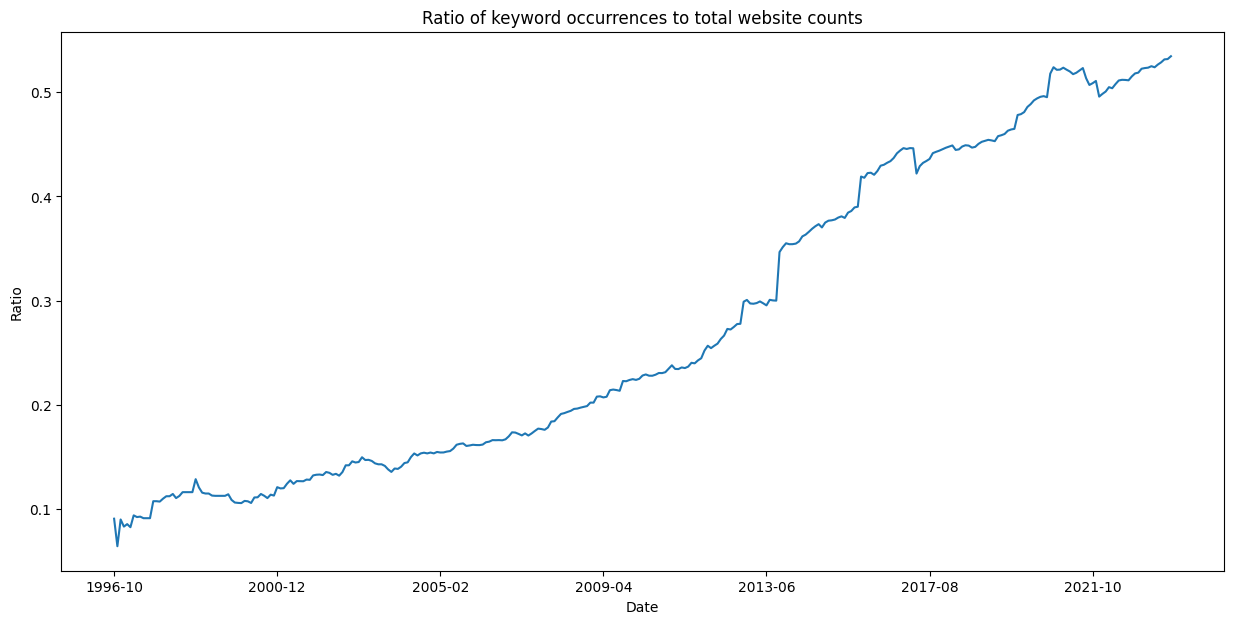

In [69]:
result = total_count_df.sum(axis=0) / exists_df.sum(axis=0)

result.plot(kind='line', figsize=(15, 7))
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.title('Ratio of keyword occurrences to total website counts')
plt.show()

In [70]:
# Flatten the dataframe and filter elements with length < 500
filtered_elements = df.applymap(lambda x: x if len(str(x)) < 500 and len(str(x)) > 200 else None).stack().dropna()

# Sample 20 elements
sampled_elements = filtered_elements.sample(20)
print(sampled_elements)

print("\n=========================\n".join(sampled_elements.tolist()))

3965  2010-08    \nTAG Heuer Watches > Swiss Luxury Watches - M...
2419  2010-06    \n\tOfficial Longines website - Longines Swiss...
4302  2000-05    \nWelcome to Utz Quality Foods\n© 1998 Conway ...
1076  2007-10    \nDeering Banjo Company - 3733 Kenora Dr. Spri...
2371  2008-04    \nLib Technologies Snowboards 2007-2008, Handc...
4030  2013-06    \nWelcome to GRIMBLADES.COM\nGRIMBLADES.COM\nI...
3215  2002-11    \nWelcome to pcwmd.com\nProfessional \n       ...
200   2002-01    \nanchor, steam, brewing, brewery, calendar, 2...
357   2015-07    \nBaker's Edge - Edge Brownie Pan - Simple Las...
1172  2013-11    \nWelcome to Double-H Boots\nclose\nKeep in To...
965   2000-12    \nCotterman Home Page\nCotterman Company is a ...
2471  2006-05    \nWelcome to Mac Tools\nOnline Store\nView \r\...
3683  2002-05      SmartWool          The SmartWool site requir...
314   2001-09    \nAvalon Acoustics Home\n Sentinel Active Refe...
1537  2018-08    \nFreaker USA - The one size fits all beverag

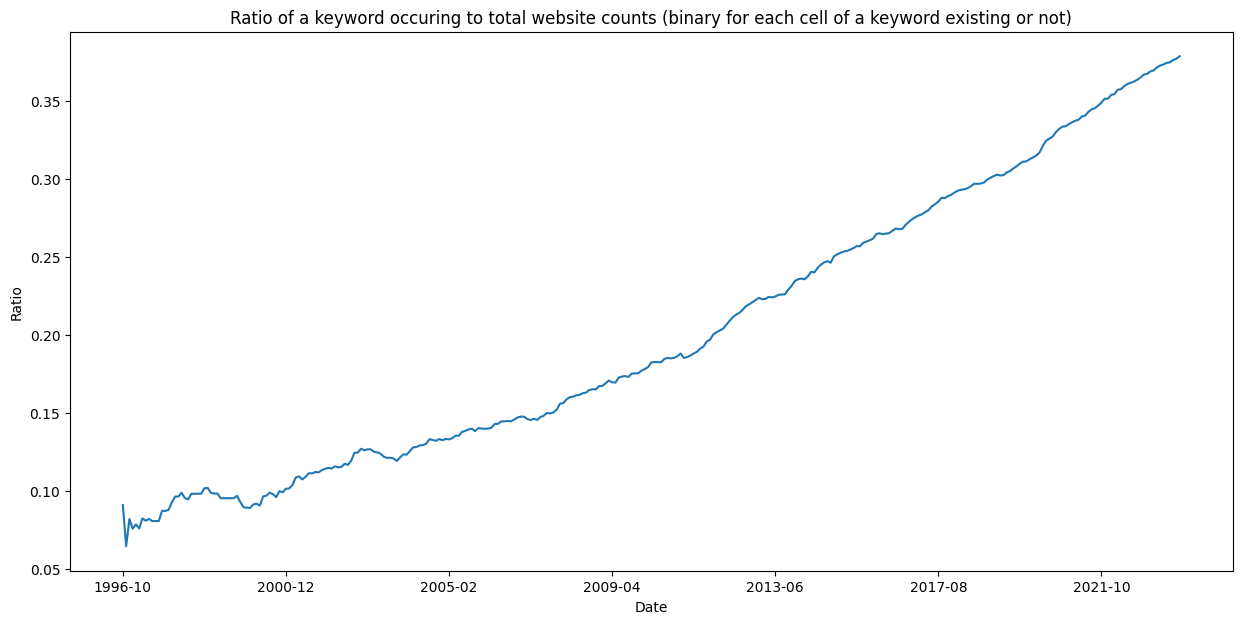

In [71]:

result = binary_df.sum(axis=0) / exists_df.sum(axis=0)

result.plot(kind='line', figsize=(15, 7))
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.title('Ratio of a keyword occuring to total website counts (binary for each cell of a keyword existing or not)')
plt.show()

1996-10       1
1996-11       2
1996-12      10
1997-01      10
1997-02      11
           ... 
2023-06    1692
2023-07    1694
2023-08    1703
2023-09    1708
2023-10    1717
Length: 325, dtype: int64